In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from skimpy import skim
from mlxtend.frequent_patterns import apriori , association_rules

In [102]:
pd.set_option('display.float_format','{:,.2f}'.format)

In [103]:
#importing dataset
original_mba_df = pd.read_csv('Sales Transaction.csv')
original_mba_df.head(5)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,"17,490.00",United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,"13,069.00",United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,"13,069.00",United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,"13,069.00",United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,"13,069.00",United Kingdom


In [104]:
#copying original df
df = original_mba_df.copy()
df.sample(5)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
344676,553462,5/17/2019,23172,Regency Tea Plate Pink,11.94,12,"17,147.00",United Kingdom
315749,556487,6/12/2019,22994,Travel Card Wallet Retrospot,10.68,1,"17,289.00",United Kingdom
46729,578211,11/23/2019,22940,Feltcraft Christmas Fairy,6.13,1,"12,748.00",United Kingdom
472893,541567,1/19/2019,22908,Pack Of 20 Napkins Red Apples,11.12,24,"12,681.00",France
20407,580260,12/2/2019,22999,Travel Card Wallet Vintage Leaf,6.19,4,"14,085.00",United Kingdom


### Data Exploration

In [105]:
df.shape

(536350, 8)

In [106]:
df.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country'],
      dtype='object')

In [107]:
df.dtypes

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object

In [108]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].sample()

524272   2018-12-06
Name: Date, dtype: datetime64[ns]

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536350 non-null  object        
 1   Date           536350 non-null  datetime64[ns]
 2   ProductNo      536350 non-null  object        
 3   ProductName    536350 non-null  object        
 4   Price          536350 non-null  float64       
 5   Quantity       536350 non-null  int64         
 6   CustomerNo     536295 non-null  float64       
 7   Country        536350 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.7+ MB


## Attribute Information:
TransactionNo: Transaction number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

Date: Date, the day when each transaction was generated.

ProductNo: Product (item) number.

ProductName: Product (item) name. Nominal.

Price: Price. Numeric, Product price per unit.

Quantity: The quantities of each product (item) per transaction. Numeric.

CustomerNo: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

In [110]:
df.head(5)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,"17,490.00",United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,"13,069.00",United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,"13,069.00",United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,"13,069.00",United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,"13,069.00",United Kingdom


In [111]:
df['ProductName'] = df['ProductName'].str.strip()
df['Country'] = df['Country'].str.strip()


In [112]:
df['CustomerNo'].unique()

array([17490., 13069., 12433., ..., 13065., 18011., 17558.])

In [113]:
df.isna().any()

TransactionNo    False
Date             False
ProductNo        False
ProductName      False
Price            False
Quantity         False
CustomerNo        True
Country          False
dtype: bool

In [114]:
df.isna().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [115]:
df.isna().mean()

TransactionNo   0.00
Date            0.00
ProductNo       0.00
ProductName     0.00
Price           0.00
Quantity        0.00
CustomerNo      0.00
Country         0.00
dtype: float64

In [116]:
df[df['CustomerNo'].isna()].head(5)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
6511,C581406,2019-12-08,46000M,Polyester Filler Pad 45x45cm,6.19,-240,NaN,United Kingdom
6512,C581406,2019-12-08,46000S,Polyester Filler Pad 40x40cm,6.19,-300,NaN,United Kingdom
90098,C575153,2019-11-08,22947,Wooden Advent Calendar Red,44.25,-1,NaN,United Kingdom
102671,C574288,2019-11-03,22178,Victorian Glass Hanging T-Light,25.37,-1,NaN,United Kingdom
117263,C573180,2019-10-28,23048,Set Of 10 Lanterns Fairy Light Star,14.50,-1,NaN,United Kingdom


In [117]:
no_cancel_df = df[~df['TransactionNo'].str.startswith('C')]


In [118]:
no_cancel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527765 entries, 0 to 536324
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  527765 non-null  object        
 1   Date           527765 non-null  datetime64[ns]
 2   ProductNo      527765 non-null  object        
 3   ProductName    527765 non-null  object        
 4   Price          527765 non-null  float64       
 5   Quantity       527765 non-null  int64         
 6   CustomerNo     527764 non-null  float64       
 7   Country        527765 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.2+ MB


In [119]:
no_cancel_df.isna().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       1
Country          0
dtype: int64

In [120]:
no_cancel_df.isna().mean()

TransactionNo   0.00
Date            0.00
ProductNo       0.00
ProductName     0.00
Price           0.00
Quantity        0.00
CustomerNo      0.00
Country         0.00
dtype: float64

In [121]:
#removing Null Value
no_cancel_df = no_cancel_df.dropna()

In [122]:
no_cancel_df.isna().sum().sum()
print(f'Total Null Value::{no_cancel_df.isna().sum().sum()}')

Total Null Value::0


In [123]:
#checking for duplicate value
no_cancel_df.duplicated().any()

True

In [124]:
no_cancel_df.duplicated().sum()
print(f'Total Duplicated Value::{no_cancel_df.duplicated().sum()}')

Total Duplicated Value::5163


In [125]:
#removing duplicate data
no_cancel_df = no_cancel_df.drop_duplicates()
print(f'Total Duplicated Value::{no_cancel_df.duplicated().sum()}')

Total Duplicated Value::0


In [126]:
no_cancel_df['CustomerNo'] = no_cancel_df['CustomerNo'].astype(str)


In [127]:
no_cancel_df[no_cancel_df['Quantity'] <= 0]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


<Axes: >

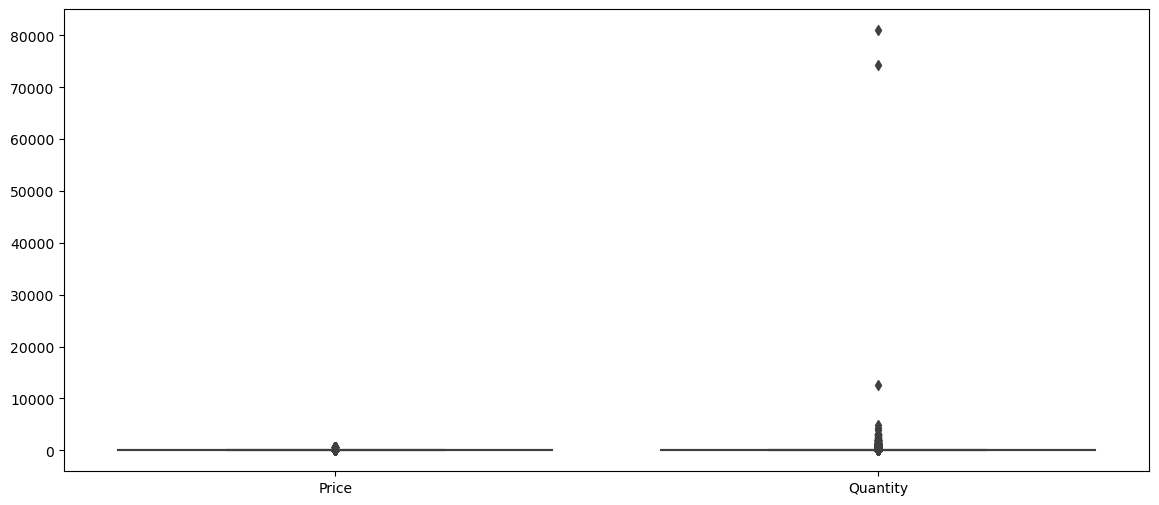

In [128]:
#checking for Outliers
plt.figure(figsize=(14,6))
sns.boxplot(data= no_cancel_df)

 since these quantity may be real so not solving outliers

In [129]:
df = no_cancel_df

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522601 entries, 0 to 536324
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  522601 non-null  object        
 1   Date           522601 non-null  datetime64[ns]
 2   ProductNo      522601 non-null  object        
 3   ProductName    522601 non-null  object        
 4   Price          522601 non-null  float64       
 5   Quantity       522601 non-null  int64         
 6   CustomerNo     522601 non-null  object        
 7   Country        522601 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 35.9+ MB


In [227]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,522601,2019-07-04 03:24:39.489706496,2018-12-01 00:00:00,2019-03-28 00:00:00,2019-07-20 00:00:00,2019-10-19 00:00:00,2019-12-09 00:00:00,NaN
Price,"522,601.00",12.64,5.13,10.99,11.94,14.09,660.62,7.97
Quantity,"522,601.00",10.67,1.00,1.00,4.00,12.00,"80,995.00",157.54
Total Price,"522,601.00",120.13,5.13,17.90,44.48,120.80,"1,002,718.10","1,860.16"
YearMonth,522601,2019-06-20 02:47:36.669619968,2018-12-01 00:00:00,2019-03-01 00:00:00,2019-07-01 00:00:00,2019-10-01 00:00:00,2019-12-01 00:00:00,NaN


In [228]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 522601 │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 10     │ │ datetime64  │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0    ┃ p25     ┃ p50    ┃ p75    ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Price          │   0 │      0 │   12.64 │   7.966 │  5.13 │   10.99 │  11.94 │  14.09 │     660.6 │   ▇    │  │
│ │ Quantity       │   0 │      0 │   10.67 │   157.5 │     1 │       1 │      4 │     12 │     81000 │   ▇    │  │
│ │ Total Price    │   0 │      0 │   120.1 │    1860 │  5.13 │    17.9 │  44.48 │  120.8 │   1003000 │   ▇    │  │
│ └────────────────┴─────┴────────┴─────────┴─────────┴───────┴─────────┴────────┴────────┴───────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Date                   │      0 │         0 │     2018-12-01      │     2019-12-09      │ None             │  │
│ │ YearMonth              │      0 │         0 │     2018-12-01      │     2019-12-01      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ TransactionNo                │      0 │          0 │                           1 │                  522601 │  │
│ │ ProductNo                    │      0 │          0 │                           1 │                  522601 │  │
│ │ ProductName                  │      0 │          0 │                         4.4 │                 2301911 │  │
│ │ CustomerNo                   │      0 │          0 │                           1 │                  522601 │  │
│ │ Country                      │      0 │          0 │                         1.9 │                  996310 │  │
│ └──────────────────────────────┴────────┴────────────┴

# EDA

In [131]:
#top 10 product 
top10_product = df['ProductName'].value_counts().reset_index().head(10)
top10_product

,ProductName,count
0,Cream Hanging Heart T-Light Holder,2324
1,Jumbo Bag Red Retrospot,2112
2,Regency Cakestand 3 Tier,2010
3,Party Bunting,1701
4,Lunch Bag Red Retrospot,1584
5,Assorted Colour Bird Ornament,1478
6,Popcorn Holder,1419
7,Set Of 3 Cake Tins Pantry Design,1392
8,Pack Of 72 Retrospot Cake Cases,1355
9,Lunch Bag Suki Design,1308


Text(0.5, 1.0, 'Top 10 Product Name vs Counts')

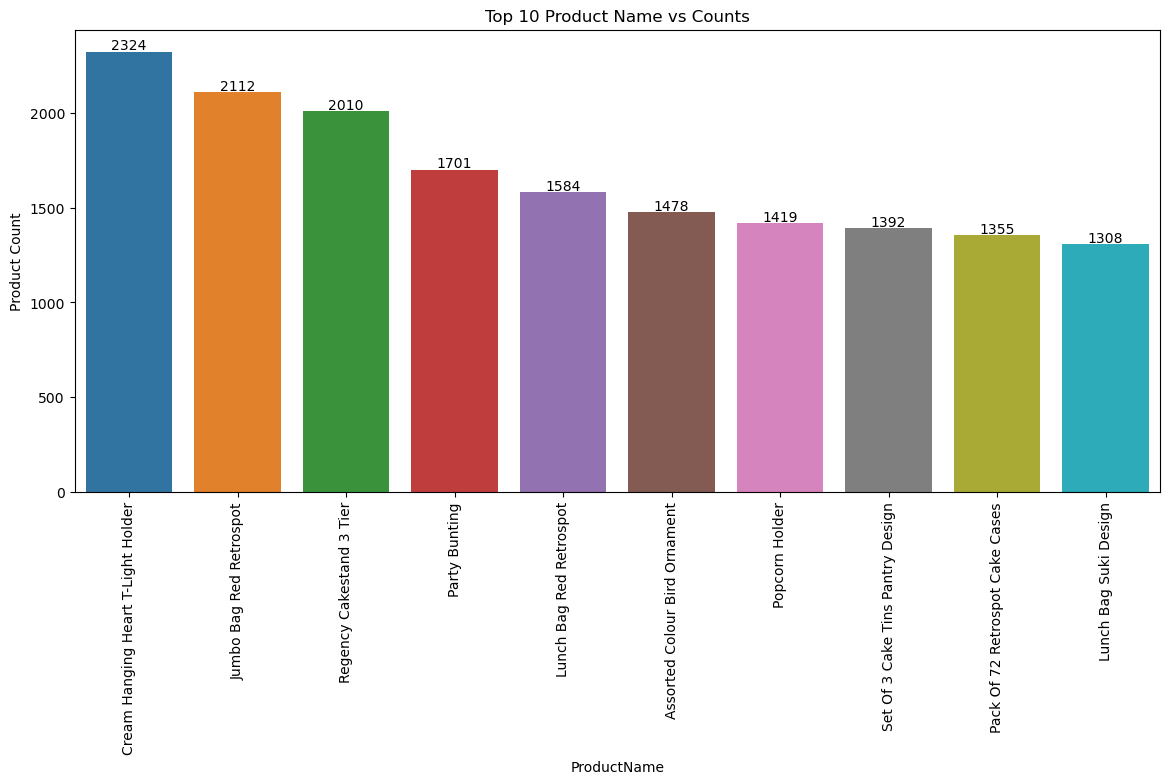

In [132]:
plt.figure(figsize=(14,6))
bar10 = sns.barplot(data=top10_product, x = 'ProductName', y= 'count')
for a in bar10.patches:
    plt.annotate(
        f'{a.get_height():.0f}',
        (a.get_x() + a.get_width()/2, a.get_height()+10),
        ha = 'center', fontsize = 10
    )
plt.xticks(rotation = 90)
plt.ylabel('Product Count')
plt.title('Top 10 Product Name vs Counts')

In [133]:
df['Total Price'] =df['Price'] * df['Quantity']
df['Total Price'].head()

0   257.64
1   383.40
2   138.36
3   127.80
4    71.64
Name: Total Price, dtype: float64

In [134]:
tot_price_per_country = df.groupby(['Country'])['Total Price'].sum().sort_values(ascending=False).reset_index()
top10_country_per_tot_price = tot_price_per_country.head(10)
Bottom10_country_per_tot_price = tot_price_per_country.tail(10)
Bottom10_country_per_tot_price

,Country,Total Price
28,United Arab Emirates,"11,966.26"
29,Greece,"9,666.53"
30,Lithuania,"8,188.08"
31,Czech Republic,"7,674.44"
32,European Community,"6,210.23"
33,Lebanon,"5,692.32"
34,Brazil,"4,652.27"
35,RSA,"4,259.83"
36,Bahrain,"3,226.86"
37,Saudi Arabia,969.50


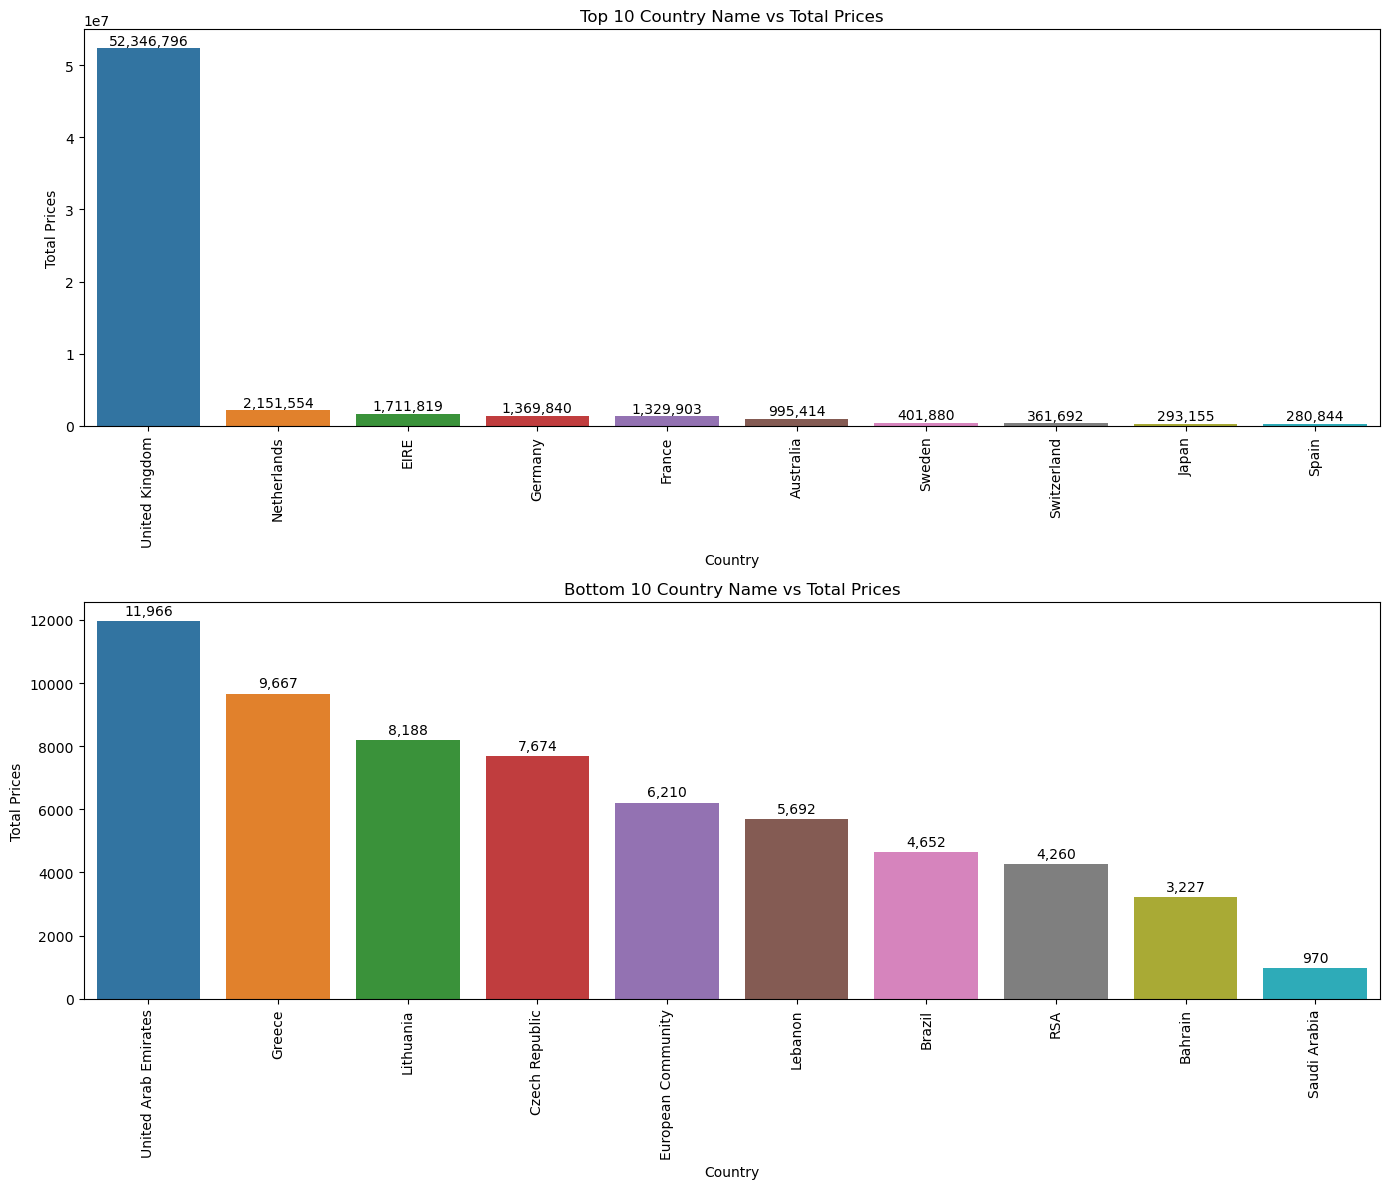

In [135]:
plt.figure(figsize=(14,12))
plt.subplot(2,1,1)
bar10 = sns.barplot(data=top10_country_per_tot_price, x = 'Country', y= 'Total Price')
for a in bar10.patches:
    plt.annotate(
        f'{a.get_height():,.0f}',
        (a.get_x() + a.get_width()/2, a.get_height()+500000),
        ha = 'center', fontsize = 10
    )
plt.xticks(rotation = 90)
plt.ylabel('Total Prices')
plt.title('Top 10 Country Name vs Total Prices')
plt.subplot(2,1,2)
bar10 = sns.barplot(data=Bottom10_country_per_tot_price, x = 'Country', y= 'Total Price')
for a in bar10.patches:
    plt.annotate(
        f'{a.get_height():,.0f}',
        (a.get_x() + a.get_width()/2, a.get_height()+200),
        ha = 'center', fontsize = 10
    )
plt.xticks(rotation = 90)
plt.ylabel('Total Prices')
plt.title('Bottom 10 Country Name vs Total Prices')
plt.tight_layout()

In [157]:
df['YearMonth'] = df['Date'].dt.strftime('%Y-%m')
df['YearMonth'] = pd.to_datetime(df['YearMonth'])

In [161]:
tran_count_per_month = df.groupby(['YearMonth'])['TransactionNo'].count().reset_index()
tran_count_per_month = tran_count_per_month.rename(columns={
    'TransactionNo': 'Transaction Count'
})
tran_count_per_month

,YearMonth,Transaction Count
0,2018-12-01,40899
1,2019-01-01,33860
2,2019-02-01,26759
3,2019-03-01,35318
4,2019-04-01,28707
5,2019-05-01,35756
6,2019-06-01,35533
7,2019-07-01,38138
8,2019-08-01,34092
9,2019-09-01,48635


<Axes: xlabel='YearMonth', ylabel='Transaction Count'>

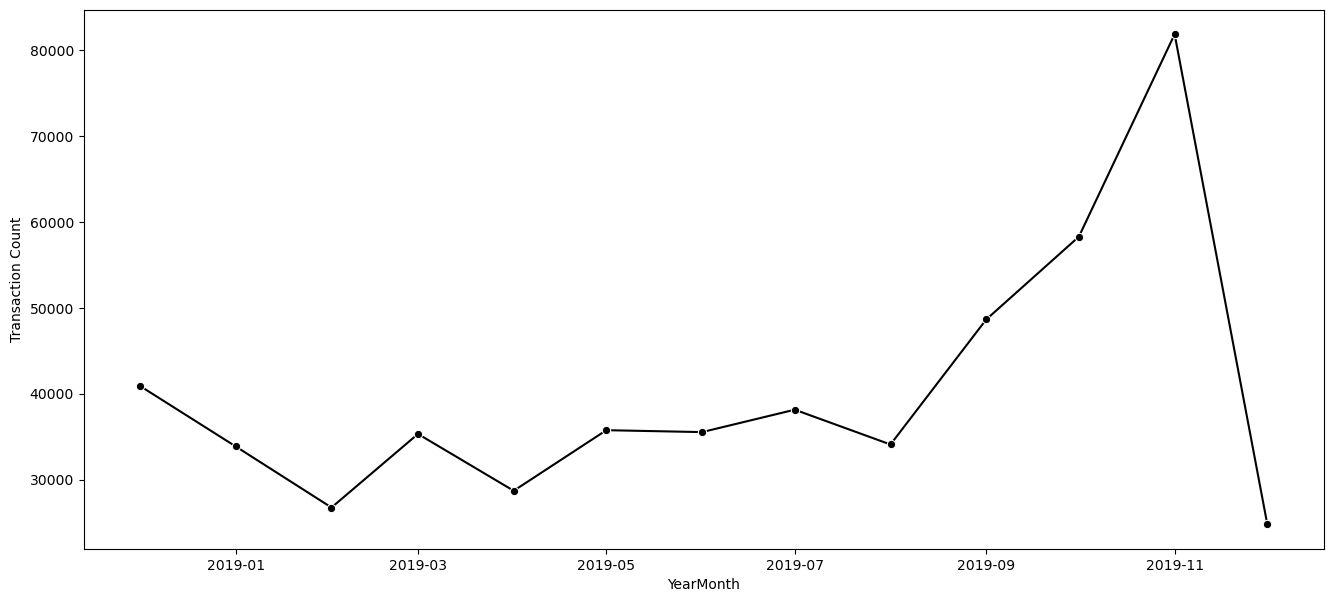

In [172]:
plt.figure(figsize=(16,7))
#plt.subplot(1,2,1)
sns.lineplot(data=tran_count_per_month, x= 'YearMonth',y='Transaction Count',c = 'black',marker='o')


In [174]:
Total_price_per_month = df.groupby(['YearMonth'])['Price'].sum().reset_index()
Total_price_per_month = tran_count_per_month.rename(columns={
    'TransactionNo': 'Transaction Count'
})
Total_price_per_month

,YearMonth,Price
0,2018-12-01,"577,446.97"
1,2019-01-01,"459,579.86"
2,2019-02-01,"366,047.60"
3,2019-03-01,"480,555.84"
4,2019-04-01,"384,451.20"
5,2019-05-01,"475,485.48"
6,2019-06-01,"470,452.51"
7,2019-07-01,"490,215.96"
8,2019-08-01,"439,727.48"
9,2019-09-01,"630,352.62"


Text(2019-11-01 00:00:00, 905203.14, '905,203')

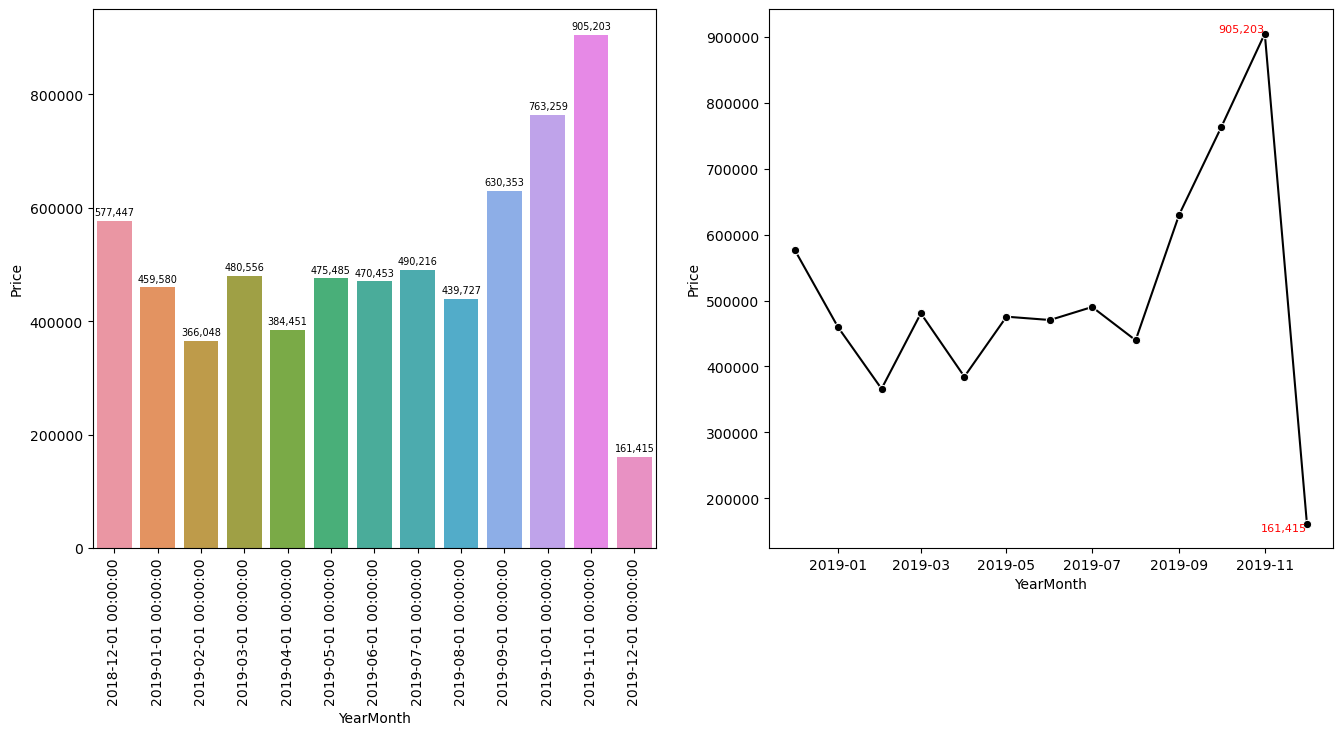

In [201]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
bartp =sns.barplot(data=Total_price_per_month, x= 'YearMonth',y='Price')
for a in bartp.patches:
    plt.annotate(
        f'{a.get_height():,.0f}',
        (a.get_x() + a.get_width()/2, a.get_height()+10000),
        ha = 'center', fontsize = 7
    )
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.lineplot(data=Total_price_per_month, x= 'YearMonth',y='Price',c = 'black',marker='o')
plt.text(
    Total_price_per_month['YearMonth'].iloc[-1], Total_price_per_month['Price'].iloc[-1],f"{Total_price_per_month['Price'].iloc[-1]:,.0f}",fontsize = 8,ha='right', va='top', color = 'Red' )
plt.text(
    Total_price_per_month['YearMonth'].iloc[-2],Total_price_per_month['Price'].iloc[-2],f"{Total_price_per_month['Price'].iloc[-2]:,.0f}" , fontsize =8,ha = 'right', va='bottom', color = 'Red')



In [216]:
df[df['Country'] == 'Unspecified']

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Total Price,YearMonth
216838,565303,2019-09-02,22904,Calendar Paper Cut Design,13.27,1,17303.0,Unspecified,13.27,2019-09-01
216839,565303,2019-09-02,21329,Dinosaurs Writing Set,11.94,1,17303.0,Unspecified,11.94,2019-09-01
216840,565303,2019-09-02,21992,Vintage Paisley Stationery Set,11.53,1,17303.0,Unspecified,11.53,2019-09-01
216841,565303,2019-09-02,20772,Garden Path Journal,12.86,1,17303.0,Unspecified,12.86,2019-09-01
216842,565303,2019-09-02,23196,Vintage Leaf Magnetic Notepad,11.74,1,17303.0,Unspecified,11.74,2019-09-01
...,...,...,...,...,...,...,...,...,...,...
509114,538635,2018-12-13,22584,Pack Of 6 Panettone Gift Boxes,12.86,2,17303.0,Unspecified,25.72,2018-12-01
509115,538635,2018-12-13,22837,Hot Water Bottle Babushka,15.02,1,17303.0,Unspecified,15.02,2018-12-01
509116,538635,2018-12-13,22469,Heart Of Wicker Small,11.94,3,17303.0,Unspecified,35.82,2018-12-01
509117,538635,2018-12-13,22191,Ivory Diner Wall Clock,18.96,1,17303.0,Unspecified,18.96,2018-12-01


In [220]:
top10_country_per_tot_price = df.groupby('Country')['Total Price'].sum().sort_values(ascending=False).reset_index().head(10)
top10_country_per_tot_price

,Country,Total Price
0,United Kingdom,"52,346,795.60"
1,Netherlands,"2,151,553.59"
2,EIRE,"1,711,819.39"
3,Germany,"1,369,839.62"
4,France,"1,329,903.39"
5,Australia,"995,414.01"
6,Sweden,"401,879.89"
7,Switzerland,"361,691.96"
8,Japan,"293,155.44"
9,Spain,"280,843.80"


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Netherlands'),
  Text(2, 0, 'EIRE'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Japan'),
  Text(9, 0, 'Spain')])

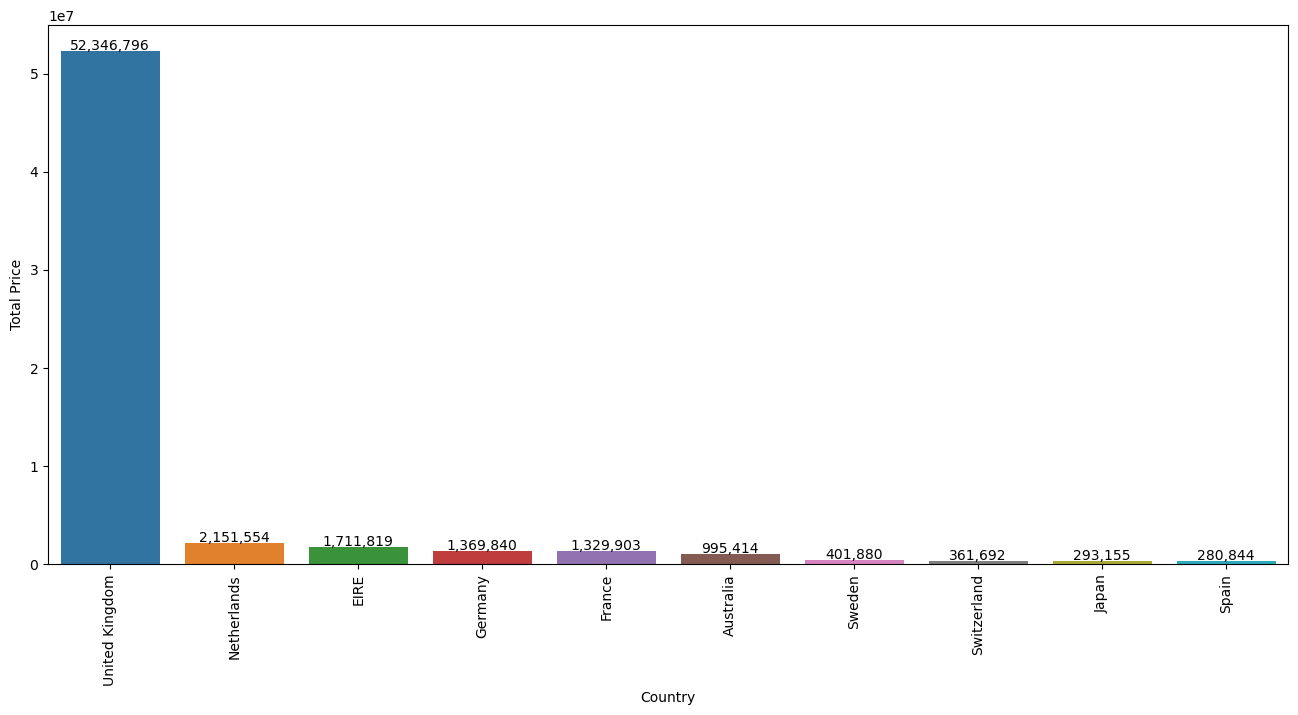

In [225]:
plt.figure(figsize=(16,7))

barcptp =sns.barplot(data=top10_country_per_tot_price, x= 'Country',y='Total Price')
for a in barcptp.patches:
    plt.annotate(
        f'{a.get_height():,.0f}',
        (a.get_x() + a.get_width()/2, a.get_height()+100000),
        ha = 'center', fontsize = 10
    )
plt.xticks(rotation = 90)
#sns.lineplot(data=top10_country_per_tot_price, x= 'Country',y='Total Price',c = 'black',marker='o')


In [141]:
df['CustomerNo'].nunique()

4718

In [142]:
df['Country'].value_counts()

Country
United Kingdom          472716
France                   10377
Germany                  10221
EIRE                      7783
Belgium                   2507
Spain                     2382
Netherlands               2326
Switzerland               2297
Portugal                  1830
Australia                 1629
Norway                     927
Austria                    884
Iceland                    785
Finland                    686
Italy                      624
Channel Islands            620
Cyprus                     563
Unspecified                443
Sweden                     408
Denmark                    408
Israel                     353
Japan                      337
USA                        266
Singapore                  215
Poland                     173
Hong Kong                  149
Canada                     149
Malta                      135
Greece                      67
United Arab Emirates        67
RSA                         57
European Community          57


### France(Second Highest) Market Basket Analysis

In [143]:
france_df = df[df['Country'] == 'France']
france_df.shape

(10377, 10)

In [144]:
france_mba = france_df.groupby(['TransactionNo','ProductName'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('TransactionNo')
france_mba

ProductName,10 Colour Spaceboy Pen,12 Coloured Party Balloons,12 Egg House Painted Wood,12 Message Cards With Envelopes,12 Pencil Small Tube Woodland,12 Pencils Small Tube Red Retrospot,12 Pencils Small Tube Skull,12 Pencils Tall Tube Posy,12 Pencils Tall Tube Red Retrospot,12 Pencils Tall Tube Woodland,...,Yellow Shark Helicopter,You're Confusing Me Metal Sign,Zinc Folkart Sleigh Bells,Zinc Heart Lattice Charger Large,Zinc Heart T-Light Holder,Zinc Herb Garden Container,Zinc Metal Heart Decoration,Zinc Star T-Light Holder,Zinc T-Light Holder Star Large,Zinc T-Light Holder Stars Small
TransactionNo,,,,,,,,,,,,,,,,,,,,,
536370,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
536852,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
536974,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
537065,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
537463,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
581001,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
581171,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [145]:
#defining encoding function to convert all data to 0 & 1
def encode01(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [146]:
france_basket = france_mba.applymap(encode01)
france_basket

ProductName,10 Colour Spaceboy Pen,12 Coloured Party Balloons,12 Egg House Painted Wood,12 Message Cards With Envelopes,12 Pencil Small Tube Woodland,12 Pencils Small Tube Red Retrospot,12 Pencils Small Tube Skull,12 Pencils Tall Tube Posy,12 Pencils Tall Tube Red Retrospot,12 Pencils Tall Tube Woodland,...,Yellow Shark Helicopter,You're Confusing Me Metal Sign,Zinc Folkart Sleigh Bells,Zinc Heart Lattice Charger Large,Zinc Heart T-Light Holder,Zinc Herb Garden Container,Zinc Metal Heart Decoration,Zinc Star T-Light Holder,Zinc T-Light Holder Star Large,Zinc T-Light Holder Stars Small
TransactionNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
(france_basket == 1).sum().sum()

10350

In [148]:
freq_itemset = apriori(france_basket,min_support=0.1,use_colnames=True)

In [149]:
rules = association_rules(freq_itemset,metric='lift',min_threshold=1)

In [150]:
rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Plasters In Tin Woodland Animals),(Plasters In Tin Circus Parade),0.17,0.17,0.10,0.60,3.53,0.07,2.09,0.86
1,(Plasters In Tin Circus Parade),(Plasters In Tin Woodland Animals),0.17,0.17,0.10,0.59,3.53,0.07,2.05,0.86
2,(Plasters In Tin Woodland Animals),(Plasters In Tin Spaceboy),0.17,0.14,0.10,0.62,4.46,0.08,2.25,0.93
3,(Plasters In Tin Spaceboy),(Plasters In Tin Woodland Animals),0.14,0.17,0.10,0.75,4.46,0.08,3.33,0.90
4,(Set/6 Red Spotty Paper Cups),(Set/20 Red Retrospot Paper Napkins),0.14,0.15,0.11,0.76,5.11,0.09,3.53,0.94
5,(Set/20 Red Retrospot Paper Napkins),(Set/6 Red Spotty Paper Cups),0.15,0.14,0.11,0.73,5.11,0.09,3.21,0.94
6,(Set/6 Red Spotty Paper Plates),(Set/20 Red Retrospot Paper Napkins),0.13,0.15,0.11,0.81,5.49,0.09,4.60,0.94
7,(Set/20 Red Retrospot Paper Napkins),(Set/6 Red Spotty Paper Plates),0.15,0.13,0.11,0.73,5.49,0.09,3.25,0.96
8,(Set/6 Red Spotty Paper Plates),(Set/6 Red Spotty Paper Cups),0.13,0.14,0.13,0.94,6.58,0.11,15.42,0.98
9,(Set/6 Red Spotty Paper Cups),(Set/6 Red Spotty Paper Plates),0.14,0.13,0.13,0.88,6.58,0.11,7.18,0.99


In [151]:
rules.sort_values(by=['confidence','lift'],ascending=[False,False]).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,"(Set/6 Red Spotty Paper Cups, Set/20 Red Retro...",(Set/6 Red Spotty Paper Plates),0.11,0.13,0.10,0.95,7.14,0.09,19.06,0.97
11,"(Set/6 Red Spotty Paper Plates, Set/20 Red Ret...",(Set/6 Red Spotty Paper Cups),0.11,0.14,0.10,0.95,6.65,0.09,18.84,0.95
8,(Set/6 Red Spotty Paper Plates),(Set/6 Red Spotty Paper Cups),0.13,0.14,0.13,0.94,6.58,0.11,15.42,0.98
9,(Set/6 Red Spotty Paper Cups),(Set/6 Red Spotty Paper Plates),0.14,0.13,0.13,0.88,6.58,0.11,7.18,0.99
10,"(Set/6 Red Spotty Paper Plates, Set/6 Red Spot...",(Set/20 Red Retrospot Paper Napkins),0.13,0.15,0.10,0.82,5.55,0.09,4.83,0.94
6,(Set/6 Red Spotty Paper Plates),(Set/20 Red Retrospot Paper Napkins),0.13,0.15,0.11,0.81,5.49,0.09,4.60,0.94
13,(Set/6 Red Spotty Paper Plates),"(Set/6 Red Spotty Paper Cups, Set/20 Red Retro...",0.13,0.11,0.10,0.78,7.14,0.09,4.01,0.99
4,(Set/6 Red Spotty Paper Cups),(Set/20 Red Retrospot Paper Napkins),0.14,0.15,0.11,0.76,5.11,0.09,3.53,0.94
3,(Plasters In Tin Spaceboy),(Plasters In Tin Woodland Animals),0.14,0.17,0.10,0.75,4.46,0.08,3.33,0.90
7,(Set/20 Red Retrospot Paper Napkins),(Set/6 Red Spotty Paper Plates),0.15,0.13,0.11,0.73,5.49,0.09,3.25,0.96


In [152]:
rules.sort_values(by=['confidence'],ascending=[False]).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,"(Set/6 Red Spotty Paper Plates, Set/20 Red Ret...",(Set/6 Red Spotty Paper Cups),0.11,0.14,0.10,0.95,6.65,0.09,18.84,0.95
12,"(Set/6 Red Spotty Paper Cups, Set/20 Red Retro...",(Set/6 Red Spotty Paper Plates),0.11,0.13,0.10,0.95,7.14,0.09,19.06,0.97
8,(Set/6 Red Spotty Paper Plates),(Set/6 Red Spotty Paper Cups),0.13,0.14,0.13,0.94,6.58,0.11,15.42,0.98
9,(Set/6 Red Spotty Paper Cups),(Set/6 Red Spotty Paper Plates),0.14,0.13,0.13,0.88,6.58,0.11,7.18,0.99
10,"(Set/6 Red Spotty Paper Plates, Set/6 Red Spot...",(Set/20 Red Retrospot Paper Napkins),0.13,0.15,0.10,0.82,5.55,0.09,4.83,0.94
6,(Set/6 Red Spotty Paper Plates),(Set/20 Red Retrospot Paper Napkins),0.13,0.15,0.11,0.81,5.49,0.09,4.60,0.94
13,(Set/6 Red Spotty Paper Plates),"(Set/6 Red Spotty Paper Cups, Set/20 Red Retro...",0.13,0.11,0.10,0.78,7.14,0.09,4.01,0.99
4,(Set/6 Red Spotty Paper Cups),(Set/20 Red Retrospot Paper Napkins),0.14,0.15,0.11,0.76,5.11,0.09,3.53,0.94
3,(Plasters In Tin Spaceboy),(Plasters In Tin Woodland Animals),0.14,0.17,0.10,0.75,4.46,0.08,3.33,0.90
5,(Set/20 Red Retrospot Paper Napkins),(Set/6 Red Spotty Paper Cups),0.15,0.14,0.11,0.73,5.11,0.09,3.21,0.94


In [153]:
rules.sort_values(by=['lift'],ascending=[False]).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,"(Set/6 Red Spotty Paper Cups, Set/20 Red Retro...",(Set/6 Red Spotty Paper Plates),0.11,0.13,0.10,0.95,7.14,0.09,19.06,0.97
13,(Set/6 Red Spotty Paper Plates),"(Set/6 Red Spotty Paper Cups, Set/20 Red Retro...",0.13,0.11,0.10,0.78,7.14,0.09,4.01,0.99
11,"(Set/6 Red Spotty Paper Plates, Set/20 Red Ret...",(Set/6 Red Spotty Paper Cups),0.11,0.14,0.10,0.95,6.65,0.09,18.84,0.95
14,(Set/6 Red Spotty Paper Cups),"(Set/6 Red Spotty Paper Plates, Set/20 Red Ret...",0.14,0.11,0.10,0.72,6.65,0.09,3.23,0.99
8,(Set/6 Red Spotty Paper Plates),(Set/6 Red Spotty Paper Cups),0.13,0.14,0.13,0.94,6.58,0.11,15.42,0.98
9,(Set/6 Red Spotty Paper Cups),(Set/6 Red Spotty Paper Plates),0.14,0.13,0.13,0.88,6.58,0.11,7.18,0.99
10,"(Set/6 Red Spotty Paper Plates, Set/6 Red Spot...",(Set/20 Red Retrospot Paper Napkins),0.13,0.15,0.10,0.82,5.55,0.09,4.83,0.94
15,(Set/20 Red Retrospot Paper Napkins),"(Set/6 Red Spotty Paper Plates, Set/6 Red Spot...",0.15,0.13,0.10,0.70,5.55,0.09,2.91,0.96
6,(Set/6 Red Spotty Paper Plates),(Set/20 Red Retrospot Paper Napkins),0.13,0.15,0.11,0.81,5.49,0.09,4.60,0.94
7,(Set/20 Red Retrospot Paper Napkins),(Set/6 Red Spotty Paper Plates),0.15,0.13,0.11,0.73,5.49,0.09,3.25,0.96
